In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import syllables
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [37]:
df_single = pd.read_csv("lcp_single_train.tsv", sep='\t')
df_multi = pd.read_csv("lcp_multi_train.tsv", sep='\t')

In [35]:
tokens = df_single['token'].values
complexity = df_single['complexity'].values

In [55]:
syll = []
for i in range(len(tokens)):
    syll.append(syllables.estimate(str(tokens[i])))
syll = np.array(syll)

In [56]:
length = []
for i in range(len(tokens)):
    length.append(len(str(tokens[i])))
length = np.array(length)

In [81]:
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
Dict = {}

for j in range(len(df_single)):
    string = str(df_single['sentence'][j])
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, " ") 
    string = string.lower().split()
    for i in range(len(string)):
        if string[i] in Dict.keys(): 
            Dict[string[i]]+=1
        else:
            Dict[string[i]]=1

In [89]:
freq = []
for i in range(len(tokens)):
    if str(tokens[i]).lower() != 'nan':
        freq.append(Dict[str(tokens[i]).lower()])
    else:
        freq.append(0)
freq = np.array(freq)

In [120]:
syll = syll.reshape((len(freq),1))
length = length.reshape((len(freq),1))
freq = freq.reshape((len(freq),1))

avg = syll.mean()
st = syll.std()
syll = (syll-avg)/st

avg = length.mean()
st = length.std()
length = (length-avg)/st

avg = freq.mean()
st = freq.std()
freq = (freq-avg)/st

X = np.concatenate((syll,length,freq),axis=1)

In [121]:
y = df_single['complexity'].values

In [146]:
np.random.seed(1)
X1 = X[:2100,:]
y1 = y[:2100]
np.random.shuffle(X1[:,0])
np.random.shuffle(X1[:,1])
np.random.shuffle(X1[:,2])
np.random.shuffle(y1)
X_train, X_test = X1[:1500,:],X1[1500:2100,:] 
y_train, y_test = y1[:1500],y1[1500:2100]

In [152]:
reg = LogisticRegression().fit(X_train, y_train)
pred = reg.predict(X_test)

ValueError: Unknown label type: 'continuous'

In [148]:
# R2_score
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.0003044981459110474

In [149]:
# metrics
# MAPE Score
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
mape(y_test,pred)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


inf

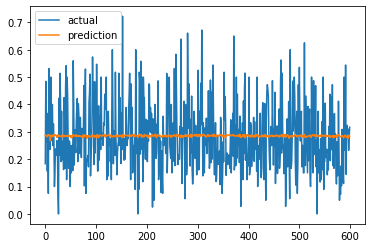

In [150]:
plt.plot(y_test, label = 'actual')
plt.plot(pred, label='prediction')
plt.legend()

0       bible
1       bible
2       bible
3       bible
4       bible
        ...  
2095    bible
2096    bible
2097    bible
2098    bible
2099    bible
Name: corpus, Length: 2100, dtype: object